# 1. 网络生成
## Newtonian Model Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pylab import mpl

#mpl.rcParams['font.sans-serif'] = ['STFangSong'] # 指定默认字体
#mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
def generator(n,m): # 生成一个有n个结点的图
    theta = 2 * np.pi * np.random.random(n)# 生成一个长度为n的角度向量
    adjacent_matrix = np.zeros([n,n])      # 创建邻接矩阵
    for i in range(m):                     # 前m个结点全连接
        for j in range(m):
            adjacent_matrix[i][j] = 1
    for i in range(m,n):                   # 连接与每个点‘双曲距离’最近的m个结点
        dist = []
        for j in range(i):
            dist.append((j+1) * (i+1) * (np.pi - np.fabs(np.pi - np.fabs(theta[i] - theta[j]))))
        dist = np.array(dist)
        index = np.argsort(dist)[:m]
        adjacent_matrix[i,index] = 1
        adjacent_matrix[index,i] = 1
    return theta, adjacent_matrix          # 输出角度向量和邻接矩阵

In [3]:
generator(100,2)

(array([4.38097395, 3.95426878, 1.15954182, 0.80476945, 4.0553715 ,
        0.82219212, 5.58804213, 4.02799519, 0.12557504, 5.05278719,
        3.60850694, 4.07887745, 1.24142998, 4.85657167, 0.59613667,
        3.98466542, 0.74835216, 5.52098248, 4.26406827, 1.44616512,
        6.20920381, 2.855606  , 4.62123376, 0.26793936, 2.96543442,
        2.03736691, 2.88772229, 5.07096238, 5.79266147, 2.65181339,
        5.96928827, 6.22745296, 2.2468101 , 2.91718946, 3.17061266,
        2.49657282, 5.56909948, 4.16614801, 2.10473265, 3.60863339,
        4.8294739 , 1.61183325, 2.73387559, 4.73859975, 3.6034826 ,
        5.00284779, 4.89434989, 5.48007232, 2.60212004, 3.43500189,
        1.92013412, 1.14224345, 3.04398571, 2.10247452, 2.75097069,
        5.61739533, 0.42949527, 0.12399239, 0.48810767, 1.53225309,
        0.14571071, 2.28847   , 3.89969446, 3.59883639, 4.07064258,
        5.63062894, 4.58288742, 3.51421332, 3.61579326, 0.71971187,
        0.35270257, 2.96454136, 3.77443809, 1.65

In [4]:
theta, adjacent_matrix = generator(100,3)   # 角度 ， 邻接矩阵

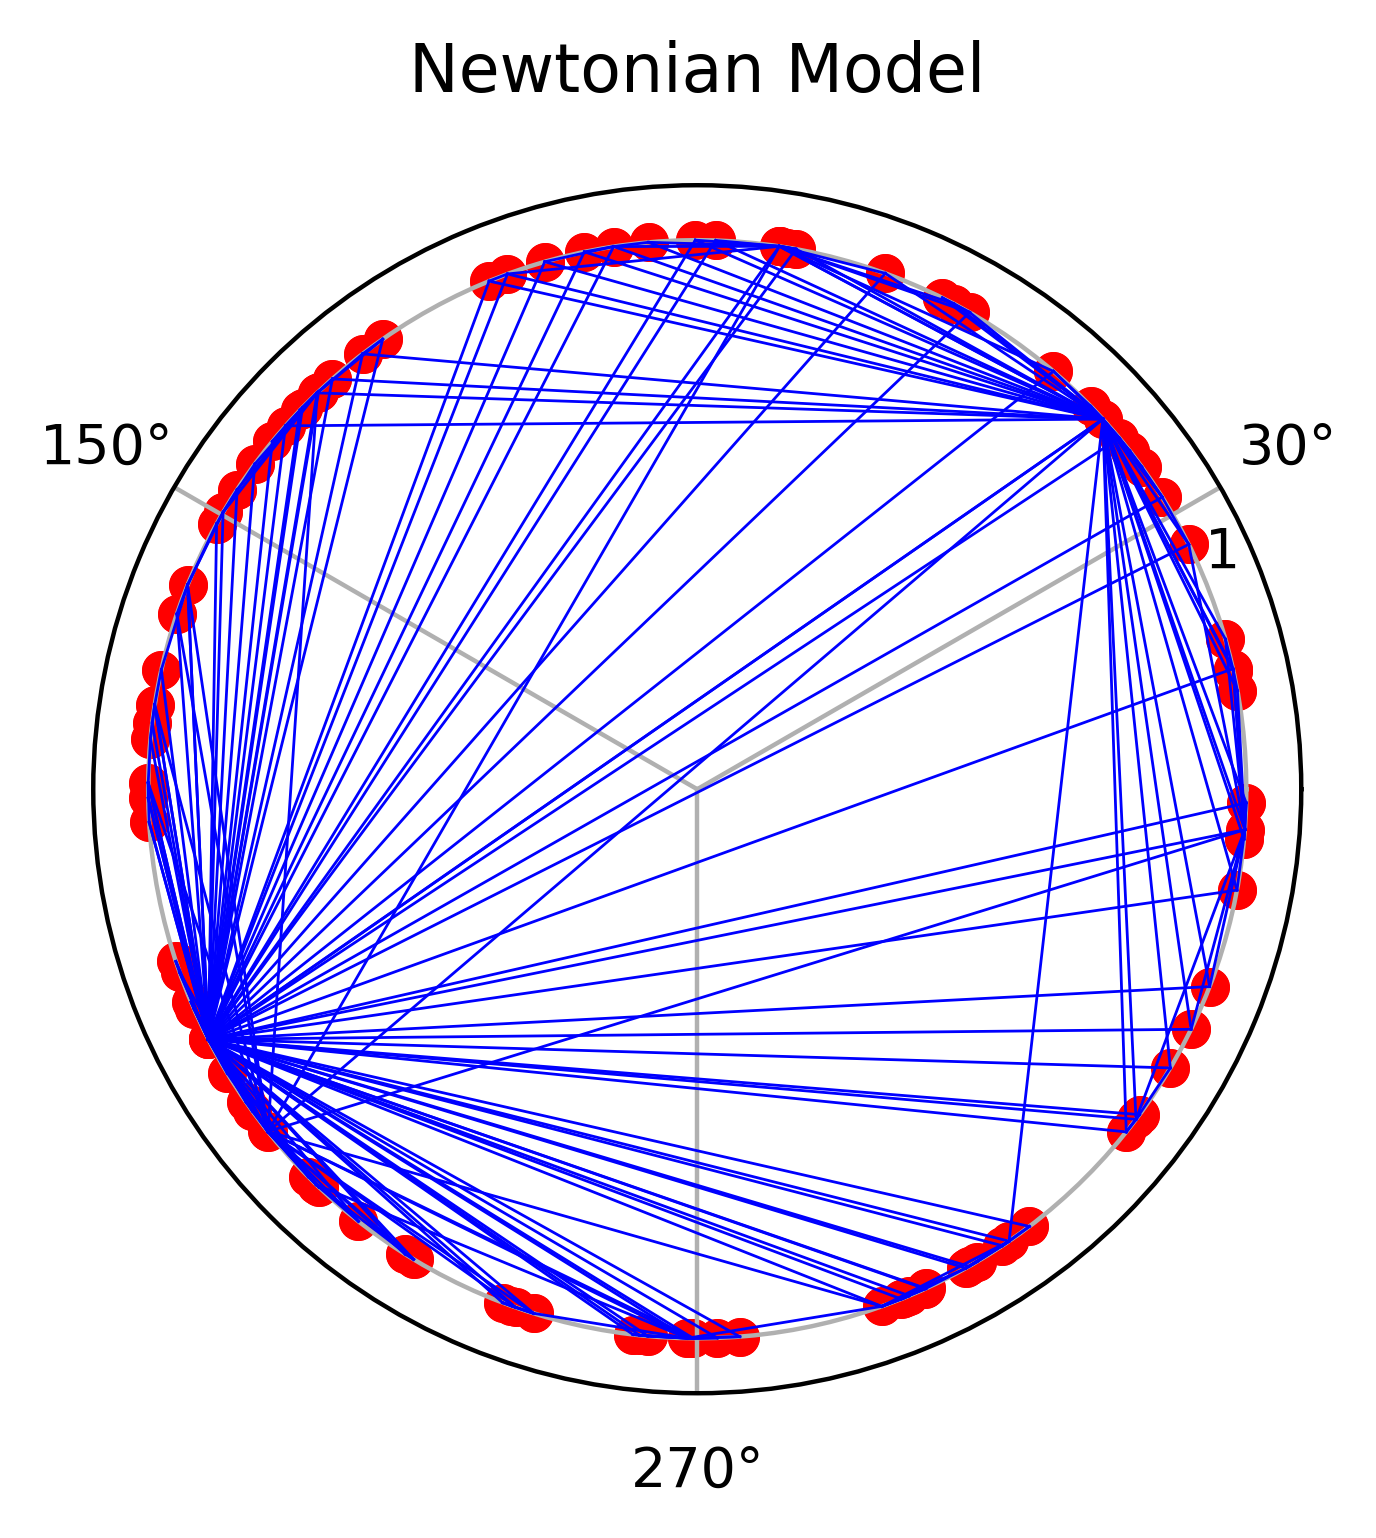

In [5]:
# Newtonian Model的可视化
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = [1]*len(theta)

ax.set_ylim((0,1.1))# 圆盘可视化的半径

# 描点
ax.scatter(theta,r,c='r')



# 连线
for i in range(len(theta)):
    for j in range(i):
        if adjacent_matrix[i][j] == 1:
            ax.plot([theta[i],theta[j]], [1,1], linewidth=0.5 ,c='b')
            
plt.thetagrids([30,150,270])# 刻度
plt.rgrids([1])
plt.title('Newtonian Model')
plt.show()

## Einsteinian Model

- 各个结点按照度的大小排名，度第$k$大的结点的的r参数设置为$\ln(k+1)$

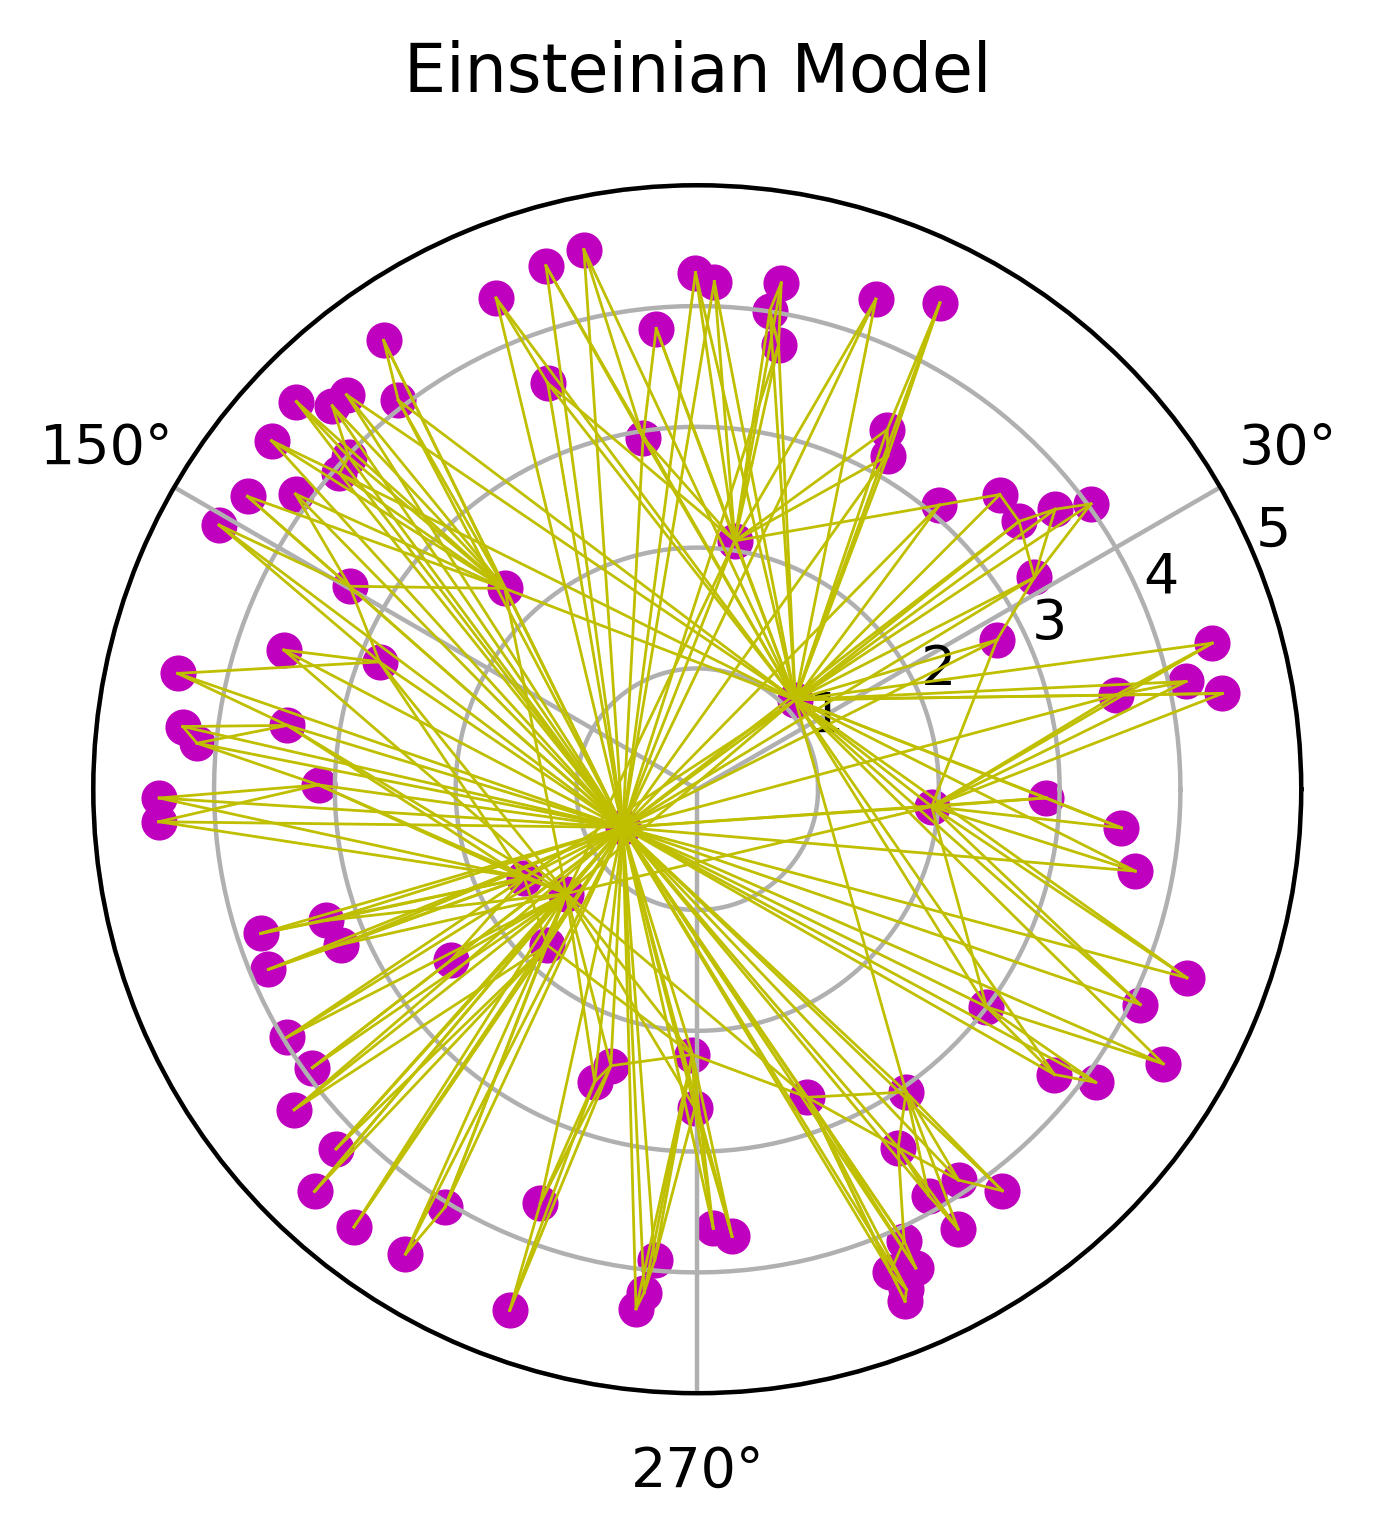

In [6]:
# 各个结点按照度的大小排名，度第k大的结点的的r参数设置为ln(k+!)
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
ax.set_ylim((0,5))# ln(100)约等于4.7
r = np.log(np.arange(1,len(theta)+1)+1)
ax.set_rmax(5)

#描点
ax.scatter(theta,r,c='m',linewidth = 0.5)

# 连线
for i in range(len(theta)):
    for j in range(i):
        if adjacent_matrix[i][j] == 1:
            ax.plot([theta[i],theta[j]], [r[i],r[j]], linewidth=0.5 ,c='y')
ax.set_rmax(5)


plt.title('Einsteinian Model')
plt.thetagrids([30,150,270])   # 刻度

plt.show()

# 2. 拟合

In [7]:
import networkx as nx

In [8]:
BA = nx.random_graphs.barabasi_albert_graph(100, 3)
BAMatrix = np.array(nx.to_numpy_matrix(BA))         # BA网络的矩阵
print(BAMatrix.sum(axis = 1))                       # 度
(-BAMatrix.sum(axis = 1)).argsort()                 # 度的排名

[14. 13.  2. 24. 24. 21.  9. 10.  9. 11. 11. 20. 11.  6. 14. 12.  9. 10.
  9.  6.  7.  4.  4.  5.  9.  5.  4.  4.  5.  4.  4.  3. 10.  5.  9.  6.
  5.  6.  6.  4. 12.  4.  3.  5.  5.  5.  3.  5.  5.  8.  3.  3.  5.  5.
  4.  4.  3.  5.  3.  4.  3.  4.  6.  3.  3.  3.  3.  3.  5.  3.  4.  3.
  3.  4.  3.  4.  3.  3.  4.  3.  3.  5.  3.  3.  3.  3.  5.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


array([ 2, 99, 79, 76, 42, 46, 98, 50, 51, 56, 58, 60, 63, 64, 65, 66, 67,
       69, 71, 72, 74, 80, 31, 77, 85, 92, 91, 94, 83, 95, 96, 90, 89, 84,
       88, 97, 87, 93, 82, 61, 59, 54, 78, 55, 39, 70, 73, 21, 22, 30, 29,
       27, 26, 75, 41, 68, 57, 81, 53, 25, 28, 33, 36, 44, 45, 43, 48, 23,
       86, 52, 47, 13, 19, 37, 62, 35, 38, 20, 49, 34, 24, 18, 16,  6,  8,
       32, 17,  7,  9, 10, 12, 15, 40,  1, 14,  0, 11,  5,  4,  3])

In [9]:
import powerlaw
results = powerlaw.Fit(BAMatrix.sum(axis = 1))
print(results.power_law.alpha)
print(results.power_law.xmin)

3.0545257212145875
3.0


Calculating best minimal value for power law fit
/Users/GeorgeXiu/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


两个函数的定义：
- 连接概率$p(x)$
- 局部似然比$\mathcal L(\theta)$

In [10]:
def link_likelihood(x_ij,r_t,T): 
    return(1/(np.e**((x_ij-r_t)/T)))

def local_likelihood(theta,A,j,t,T=1):
    L = 1
    for i in range(1,j):
        L *=  ((
            link_likelihood(
                np.log((i+1)*(j+1)*(np.pi 
                                    - np.fabs(np.pi 
                                    - np.fabs(theta[i] 
                                    - theta[j])))),
                np.log(t),
                T
        ))**A[i][j])*((
            1-link_likelihood(
                np.log((i+1)*(j+1)*(np.pi - np.fabs(np.pi - np.fabs(theta[i] - theta[j])))),
                np.log(t),
                T
        ))**(1-A[i][j]))
    return L

In [11]:
theta = 2*np.pi*np.random.random(100)    # 初始随机角度
A = nx.random_graphs.barabasi_albert_graph(100, 3) 
AMatrix = np.array(nx.to_numpy_matrix(A)) # BA邻接矩阵

In [12]:
local_likelihood(theta,AMatrix,10,100)

3165.904931475075

蒙特卡洛模拟的流程

In [13]:
def protocal(A,n_of_nodes, n_rounds):  # n个结点、n_rounds次迭代
    theta = 2*np.pi*np.random.random(n_of_nodes)
    for n_round in range(n_rounds):
        node = np.random.randint(0,n_of_nodes)
        L_c = local_likelihood(theta,A,node,np.log(n_of_nodes)) # 局部似然比
        theta_1 = theta.copy()
        theta_1[node] = 2*np.pi*np.random.random()
        L_n = local_likelihood(theta_1,A,node,np.log(n_of_nodes))
        if L_n > L_c:
            theta[node] = theta_1[node]
        else:
            if np.random.random() < L_n/L_c:
                theta[node] = theta_1[node]
    return theta     # 返回角度的蒙特卡洛估计

In [14]:
get_theta = protocal(AMatrix,100,10000)

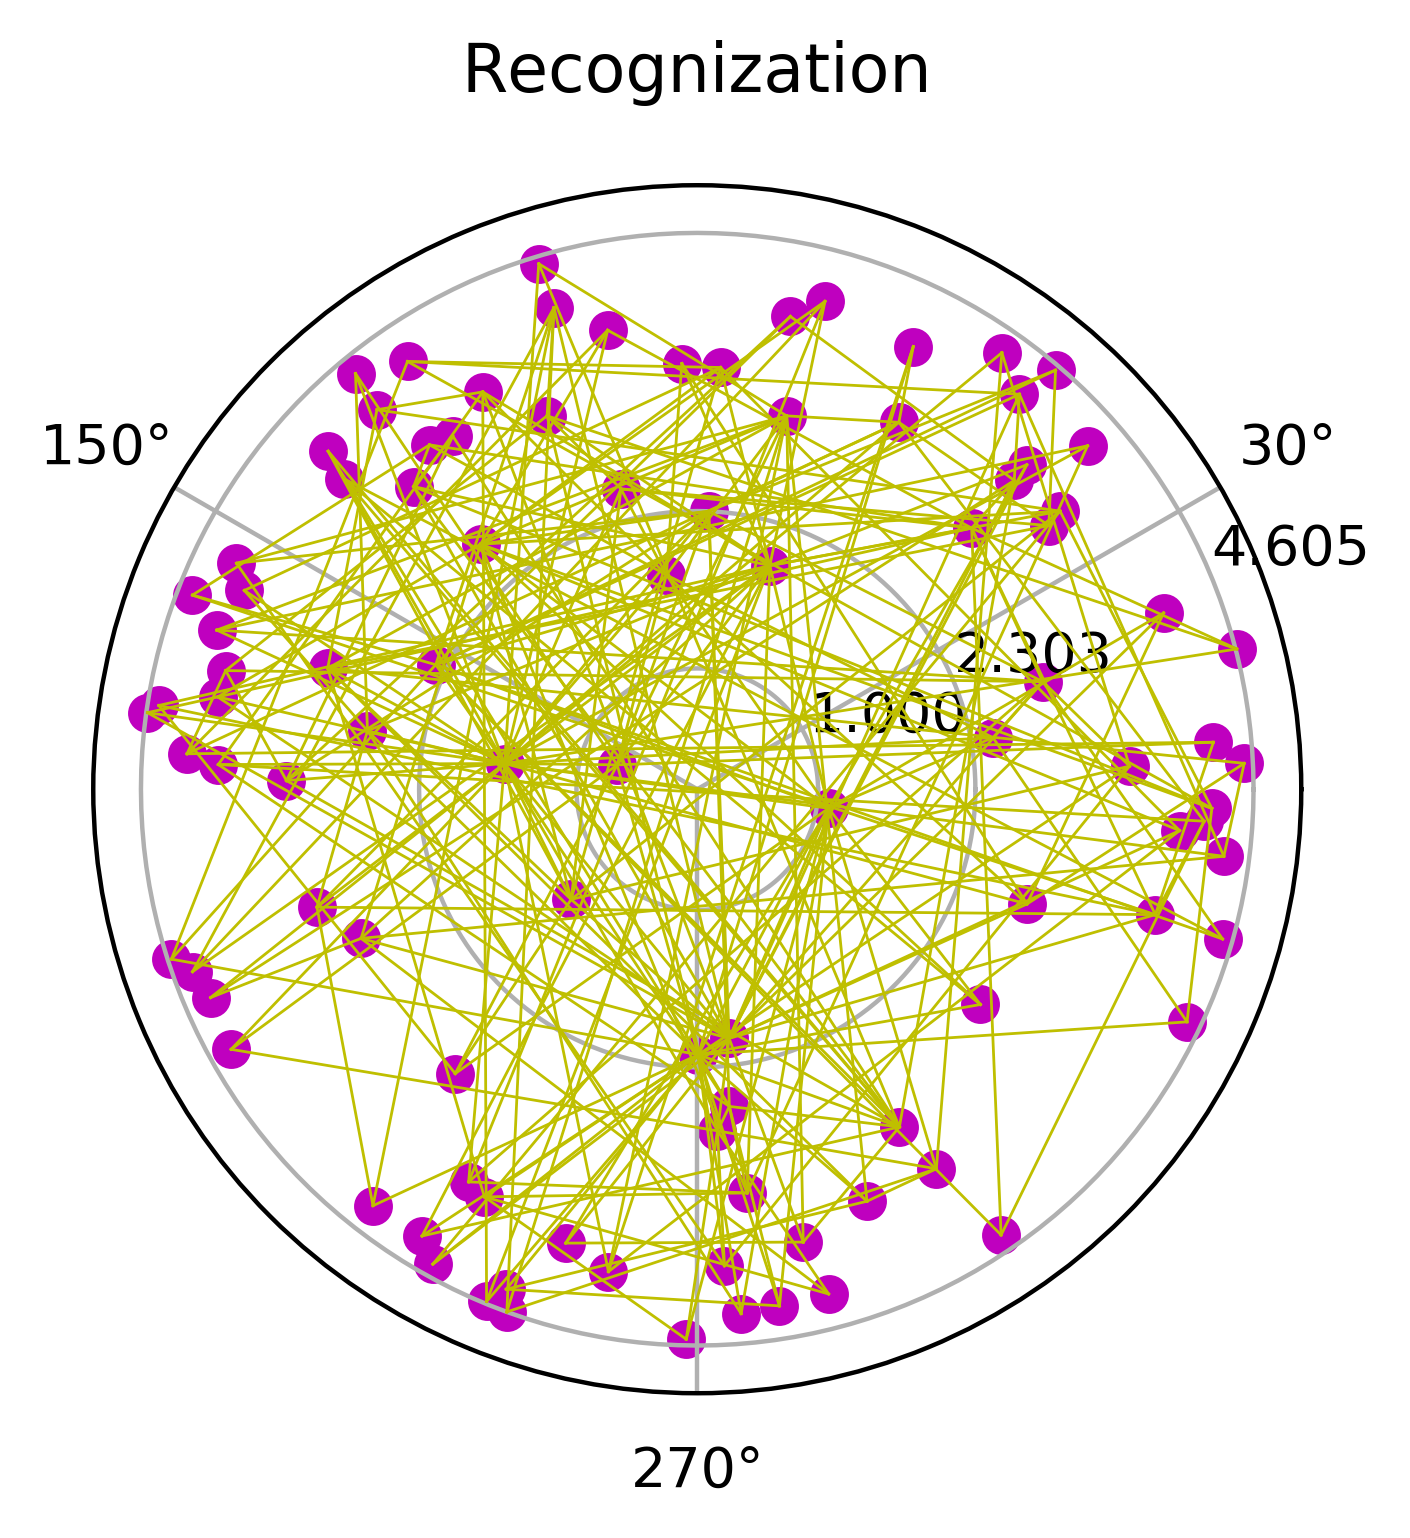

In [15]:
# 识别结果显示（这个结果有问题）
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(np.arange(1,len(theta)+1)+1)
ax.scatter(get_theta,r,c='m')
ax.set_ylim((0,5))
for i in range(len(theta)):
    for j in range(i):
        if AMatrix[i][j] == 1:
            ax.plot([get_theta[i],get_theta[j]], [r[i],r[j]], linewidth=0.5 ,c='y')
plt.title('Recognization')
plt.thetagrids([30,150,270])
plt.rgrids([1,np.log(10),np.log(100)])
plt.show()

## 修正版

1. 利用NetworkX生成一个网络：

In [4]:
BA = nx.random_graphs.barabasi_albert_graph(100, 3)
BAMatrix = np.array(nx.to_numpy_matrix(BA))# 邻接矩阵

print(BAMatrix.sum(axis = 1)) # 度

BAMatrix.sum(axis = 1).argsort()# 度的排名

[20. 17. 22. 20.  9.  4. 14.  7. 13.  7. 10. 14. 12.  9. 19. 14.  7. 11.
  7.  4.  7.  9.  3.  9.  9.  5.  8.  7.  7.  6.  6.  6.  3.  5.  8.  6.
  4.  4.  3.  5.  7.  6.  5.  7.  3.  6.  3.  4.  4.  4.  7.  3.  4.  3.
  3.  4.  3.  5.  4.  3.  3.  3.  3.  5.  3.  3.  4.  3.  3.  3.  6.  3.
  3.  3.  4.  3.  4.  3.  3.  3.  4.  3.  4.  3.  4.  4.  3.  3.  3.  3.
  4.  3.  3.  4.  3.  3.  3.  3.  3.  3.]


array([99, 73, 72, 71, 69, 68, 67, 32, 65, 64, 62, 61, 38, 60, 59, 56, 44,
       54, 46, 53, 98, 75, 51, 88, 91, 89, 22, 87, 86, 94, 92, 95, 83, 97,
       81, 79, 78, 77, 96, 52, 55, 93, 76, 90, 66, 85, 84, 82, 80, 58, 74,
       49, 48, 47, 19,  5, 37, 36, 42, 57, 25, 39, 63, 33, 70, 29, 31, 30,
       35, 41, 45,  9, 40, 28, 27, 50, 43, 20, 18,  7, 16, 26, 34,  4, 13,
       24, 21, 23, 10, 17, 12,  8, 11, 15,  6,  1, 14,  3,  0,  2])

In [5]:
index = BAMatrix.sum(axis = 1).argsort()
index # 得到degree的排名

array([99, 73, 72, 71, 69, 68, 67, 32, 65, 64, 62, 61, 38, 60, 59, 56, 44,
       54, 46, 53, 98, 75, 51, 88, 91, 89, 22, 87, 86, 94, 92, 95, 83, 97,
       81, 79, 78, 77, 96, 52, 55, 93, 76, 90, 66, 85, 84, 82, 80, 58, 74,
       49, 48, 47, 19,  5, 37, 36, 42, 57, 25, 39, 63, 33, 70, 29, 31, 30,
       35, 41, 45,  9, 40, 28, 27, 50, 43, 20, 18,  7, 16, 26, 34,  4, 13,
       24, 21, 23, 10, 17, 12,  8, 11, 15,  6,  1, 14,  3,  0,  2])

$p(x_{ij})=1/\exp(\frac{x_{ij}-R}{T})$

In [6]:
def link_likelihood(x_ij,r_t,T):
    return(1/(np.e**((x_ij-r_t)/T)))

$L_c = \prod_{i<j}p(x_{ij})^{a_{ij}}[1-p(x_{ij})]^{1-a_{ij}}$

In [7]:
def local_likelihood(theta,A,j,t,T=1):
    L = 1
    index = (-A).sum(axis = 1).argsort()
    for i in range(1,j):
        L *=  ((
            link_likelihood(
                np.log((i+1)*(j+1)*(np.pi 
                                    - np.fabs(np.pi 
                                    - np.fabs(theta[index[i]] 
                                    - theta[index[j]])))),
                np.log(t),
                T
        ))**A[i][j])*((
            1-link_likelihood(
                np.log((i+1)*(j+1)*(np.pi - np.fabs(np.pi - np.fabs(theta[index[i]] - theta[index[j]])))),
                np.log(t),
                T
        ))**(1-A[i][j]))
    return L

- MH算法的流程

In [8]:
def protocal(A,n_of_nodes, n_rounds):
    theta = 2*np.pi*np.random.random(n_of_nodes)
    for n_round in range(n_rounds):
        node = np.random.randint(0,n_of_nodes)
        L_c = local_likelihood(theta,A,node,np.log(n_of_nodes))
        theta_1 = theta.copy()
        theta_1[node] = 2*np.pi*np.random.random()
        L_n = local_likelihood(theta_1,A,node,np.log(n_of_nodes))
        if L_n > L_c:
            theta[node] = theta_1[node]
        else:
            if np.random.random() < L_n/L_c:
                theta[node] = theta_1[node]
    return theta  

- beta test

In [18]:
theta = np.random.random(100)
A = nx.random_graphs.barabasi_albert_graph(100, 3)
AMatrix = np.array(nx.to_numpy_matrix(A))

In [19]:
AMatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
import powerlaw
results = powerlaw.Fit(BAMatrix.sum(axis = 1))
print(results.power_law.alpha)
print(results.power_law.xmin)

3.3729874081380973
6.0


Calculating best minimal value for power law fit
/Users/GeorgeXiu/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [21]:
local_likelihood(theta,AMatrix,10,100)

145364590.5887669

In [22]:
%%time
get_theta = protocal(AMatrix,100,100000) # 2min30sec, 100,000 times mac pro 15''

CPU times: user 2min 34s, sys: 58.7 ms, total: 2min 34s
Wall time: 2min 34s


In [23]:
degree_rank = 99 - AMatrix.sum(axis = 1).argsort()
degree_rank

array([98,  0, 20, 21, 71, 24, 60,  1, 49, 48, 46, 44, 42, 25, 36, 26, 34,
       32, 30, 29, 18, 76, 27,  9,  5, 14,  4, 12,  7, 11,  3,  2, 15, 16,
        8, 17, 10,  6, 39, 51, 77, 37, 54, 78, 58, 90, 61, 62, 28, 23, 68,
       69, 80, 19, 57, 33, 52, 88, 47, 55, 13, 65, 67, 45, 41, 40, 53, 56,
       59, 31, 22, 43, 63, 99, 38, 64, 66, 70, 72, 97, 35, 82, 50, 79, 85,
       81, 84, 75, 87, 89, 73, 86, 92, 93, 74, 83, 96, 94, 95, 91])

In [24]:
(-AMatrix).sum(axis = 1).argsort()

array([ 8,  4,  5,  3, 16,  6, 25,  7, 13, 26, 10, 12, 15, 18, 24, 14, 20,
       49, 35, 27, 61, 64, 29, 33,  0, 17,  2, 43, 59, 40, 77, 46, 56, 58,
       68, 36, 54, 44, 52, 32, 47, 86, 11, 34, 22, 71, 76, 80, 60, 66, 62,
       19, 30, 48, 45, 42, 41, 38, 31, 21,  9, 37, 82, 83, 84, 85, 87, 51,
       89, 81, 91, 92, 93, 94, 95, 96, 97, 88, 90, 75, 78, 98, 53, 55, 57,
       39, 23, 63, 79, 65, 69, 70, 72, 73, 74, 50, 28, 67, 99,  1])

In [25]:
AMatrix.sum(axis = 1)

array([ 7.,  1.,  7., 16., 22., 19., 13., 12., 30.,  4., 11.,  5., 11.,
       12.,  9., 10., 14.,  7., 10.,  4.,  9.,  4.,  4.,  3., 10., 13.,
       11.,  7.,  3.,  7.,  4.,  4.,  5.,  7.,  5.,  7.,  6.,  4.,  4.,
        3.,  6.,  4.,  4.,  6.,  5.,  4.,  6.,  5.,  4.,  8.,  3.,  3.,
        5.,  3.,  6.,  3.,  6.,  3.,  6.,  6.,  4.,  7.,  4.,  3.,  7.,
        3.,  4.,  3.,  6.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  4.,  6.,
        3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  5.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

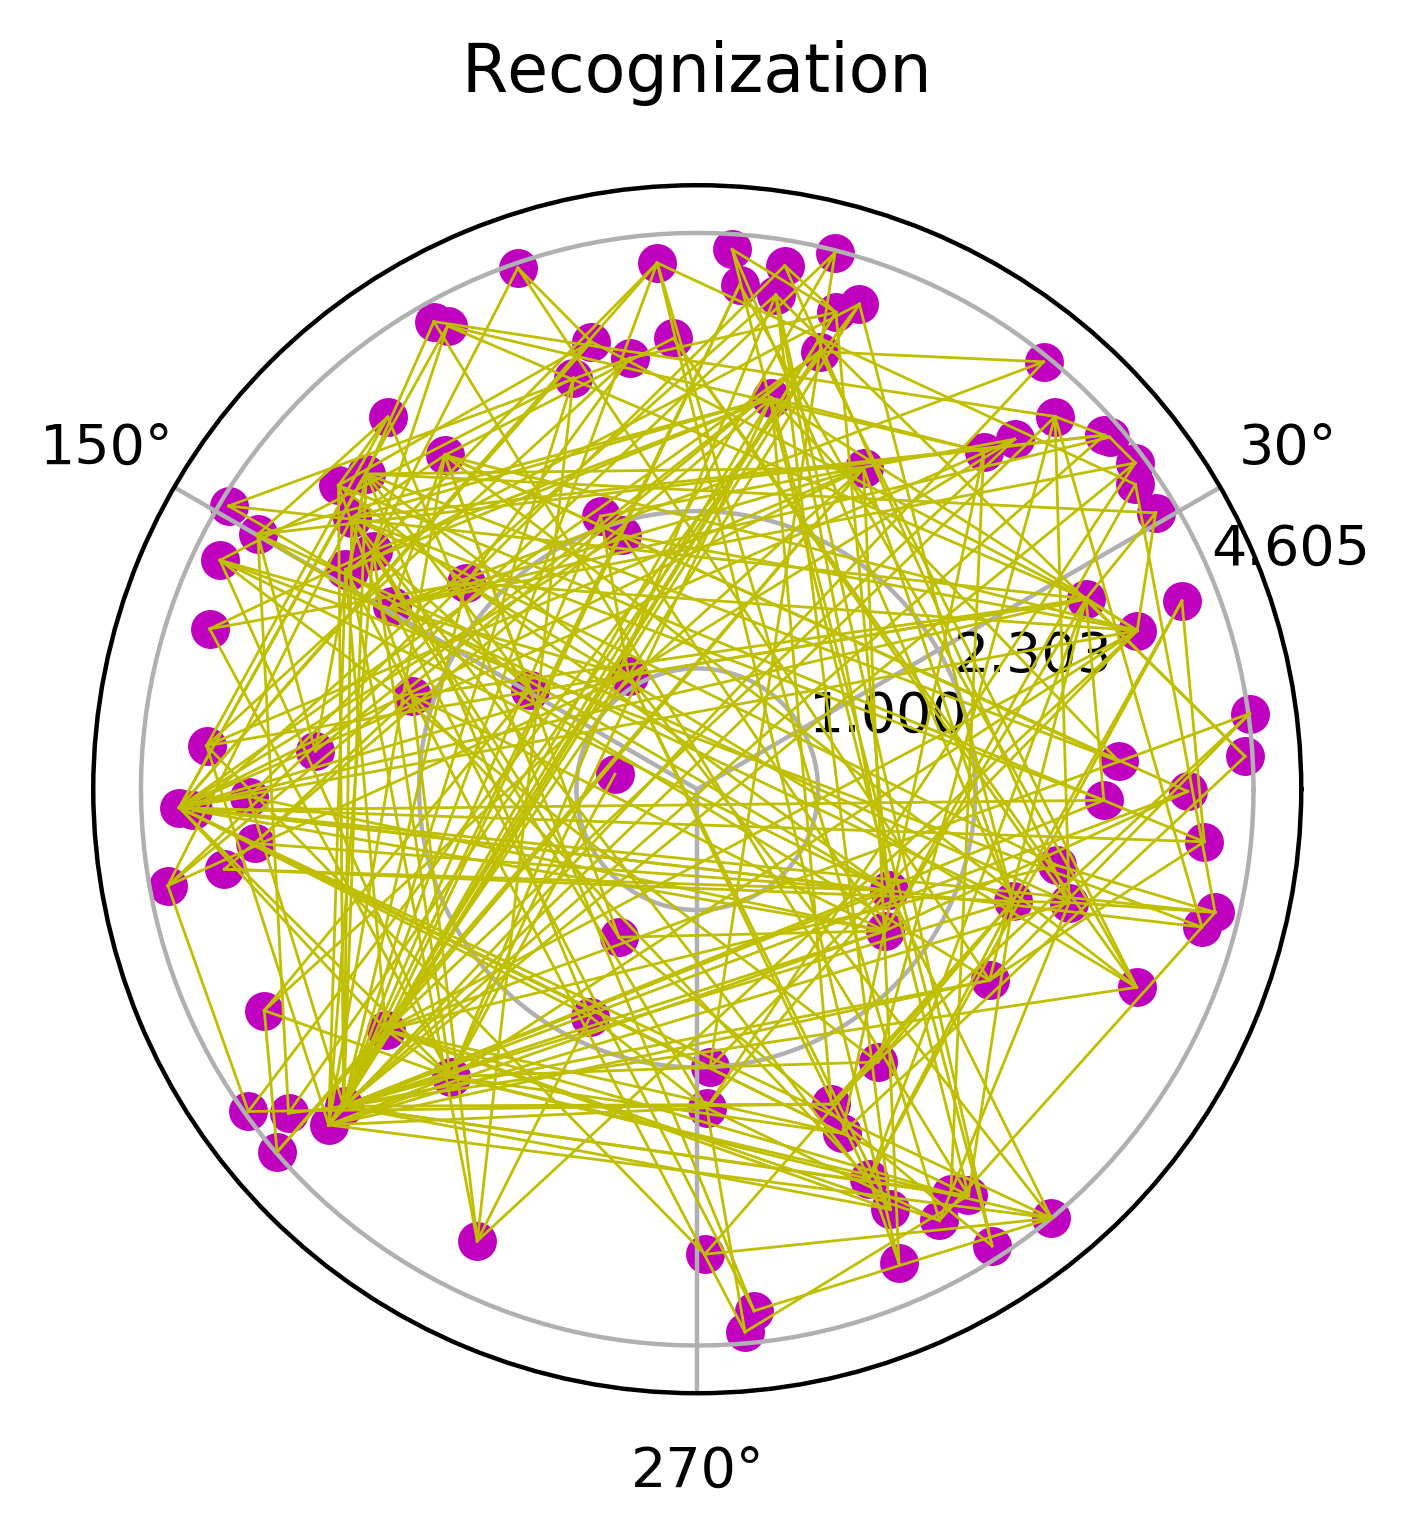

In [26]:
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(degree_rank+2)
ax.scatter(get_theta,r,c='m')
ax.set_ylim((0,5))
for i in range(len(theta)):
    for j in range(i):
        if AMatrix[i][j] == 1:
            ax.plot([get_theta[i],get_theta[j]], [r[i],r[j]], linewidth=0.5 ,c='y')
plt.title('Recognization')
plt.thetagrids([30,150,270])
plt.rgrids([1,np.log(10),np.log(100)])
plt.show()

In [27]:
theta = np.random.random(1000)
A = nx.random_graphs.barabasi_albert_graph(1000, 3)
AMatrix = np.array(nx.to_numpy_matrix(A))

In [28]:
%%time
get_theta_1000 = protocal(AMatrix,1000,10000)

CPU times: user 3min 9s, sys: 144 ms, total: 3min 9s
Wall time: 3min 9s


In [29]:
degree_rank = (-AMatrix).sum(axis = 1).argsort()

In [100]:
#%%time
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(degree_rank+2)
ax.scatter(get_theta_1000,r,c='m', marker = 'x', linewidths=0.01)
ax.set_ylim((0,7))
for i in range(len(theta)):
    for j in range(i):
        if AMatrix[i][j] == 1:
            ax.plot([get_theta_1000[i],
                     get_theta_1000[j]], 
                    [r[i],r[j]], 
                    linewidth=0.1 
                    ,c='y')
plt.title('Recognization')
plt.thetagrids([30,150,270])
plt.rgrids([1,2,3,4,5,6,7])
plt.savefig('1000_points.png',dpi = 400)

In [102]:
%%time
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(degree_rank+2)
ax.scatter(get_theta_1000[np.argwhere(degree_rank < 100)]
           ,r[np.argwhere(degree_rank < 100)],c='m', linewidths=0.1)
ax.set_ylim((0,5))
degrees = list(AMatrix.sum(axis = 1)).sort(reverse = True)
for i in range(100):
    for j in range(i):
        h = int(np.argwhere(degree_rank == i))
        k = int(np.argwhere(degree_rank == j))
        if AMatrix[i][j] == 1:
            ax.plot([get_theta_1000[h],
                     get_theta_1000[k]], 
                    [r[h],r[k]], 
                    linewidth=0.3 
                    ,c='y')
plt.title('Recognization_top100/1000')
plt.thetagrids([30,150,270])
plt.rgrids([1,2,3,4,5])
plt.savefig('top100of1000.png',dpi = 400)

CPU times: user 1.36 s, sys: 16.4 ms, total: 1.38 s
Wall time: 1.38 s


In [98]:
#%%time
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(degree_rank+2)
ax.scatter(get_theta_1000[np.argwhere(degree_rank < 100)]
           ,r[np.argwhere(degree_rank < 100)],c='m', linewidths=0.1)
ax.set_ylim((0,5))
degrees = list(AMatrix.sum(axis = 1)).sort(reverse = True)
for i in range(10):
    for j in range(i):
        h = int(np.argwhere(degree_rank == i))
        k = int(np.argwhere(degree_rank == j))
        if AMatrix[i][j] == 1:
            ax.plot([get_theta_1000[h],
                     get_theta_1000[k]], 
                    [r[h],r[k]], 
                    linewidth=0.3 
                    ,c='y')
plt.title('Recognization_top100/1000')
plt.thetagrids([30,150,270])
plt.rgrids([1,2,3,4,5])
plt.savefig('top100of1000.png',dpi = 400)

In [95]:
h = get_theta_1000[np.argwhere(degree_rank == i) for i in range(1000):]

SyntaxError: invalid syntax (<ipython-input-95-dde7ed4896cb>, line 1)

In [60]:
degrees = list(AMatrix.sum(axis = 1)).sort(reverse = True)

degrees

In [67]:
sort(list(AMatrix.sum(axis = 1)))

NameError: name 'sort' is not defined

In [50]:
j= []
for i in range(20):
    j.append(2*i)
j

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [73]:
degree_rank

array([  3,   8,  31,   2,  11,   0,   9,   7,  36,   1,  16,   4,  19,
        24,  41,  63,  12,  32,  14,  21,  43,  74, 151,  49,   6,  34,
        30,  45,   5,  57,  10,  17,  47,  26,  20,  15, 194,  42,  96,
       168,  38, 103, 125,  56,  18,  99, 142,  79, 128,  23,  37,  40,
       127,  97,  90,  25,  39,  33, 121,  68, 164,  28,  58, 208, 158,
       110, 206,  44, 240,  52, 219,  22, 113, 100, 294, 141,  89,  35,
       112, 178, 162,  29, 152,  98, 382, 201, 213,  54,  78, 200, 102,
       166, 191,  72, 131,  69, 406, 134, 234, 360, 210, 237, 169, 315,
        48,  13, 347, 203,  64, 384,  73,  71,  66,  65,  59,  55, 410,
        53, 445,  51, 149, 154,  50, 298, 238, 101,  83, 123,  87, 122,
        80, 372, 371, 346, 115, 241, 111, 188, 641, 209, 312, 187, 160,
       163, 304, 299, 198, 202, 177, 192, 195, 170, 161, 432,  46, 114,
       117, 449, 536, 243, 271, 105, 348,  91,  86,  76,  75, 367,  62,
       359, 254, 119, 124,  27, 280, 148, 147, 256, 236, 223, 46

In [76]:
int(np.argwhere(degree_rank == 10))

30

In [117]:
tree = np.matrix(np.zeros([100,100]))
for i in range(48):
    tree[i,2*i+1] = tree[2*i+1,i] = 1
    tree[i,2*i+2] = tree[2*i+2,i] = 1
tree[49,99] = tree[99,49] = 1
tree=np.array(tree)
tree

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
%%time
theta_tree = protocal(tree,100,100000)

CPU times: user 2min 49s, sys: 162 ms, total: 2min 49s
Wall time: 2min 49s


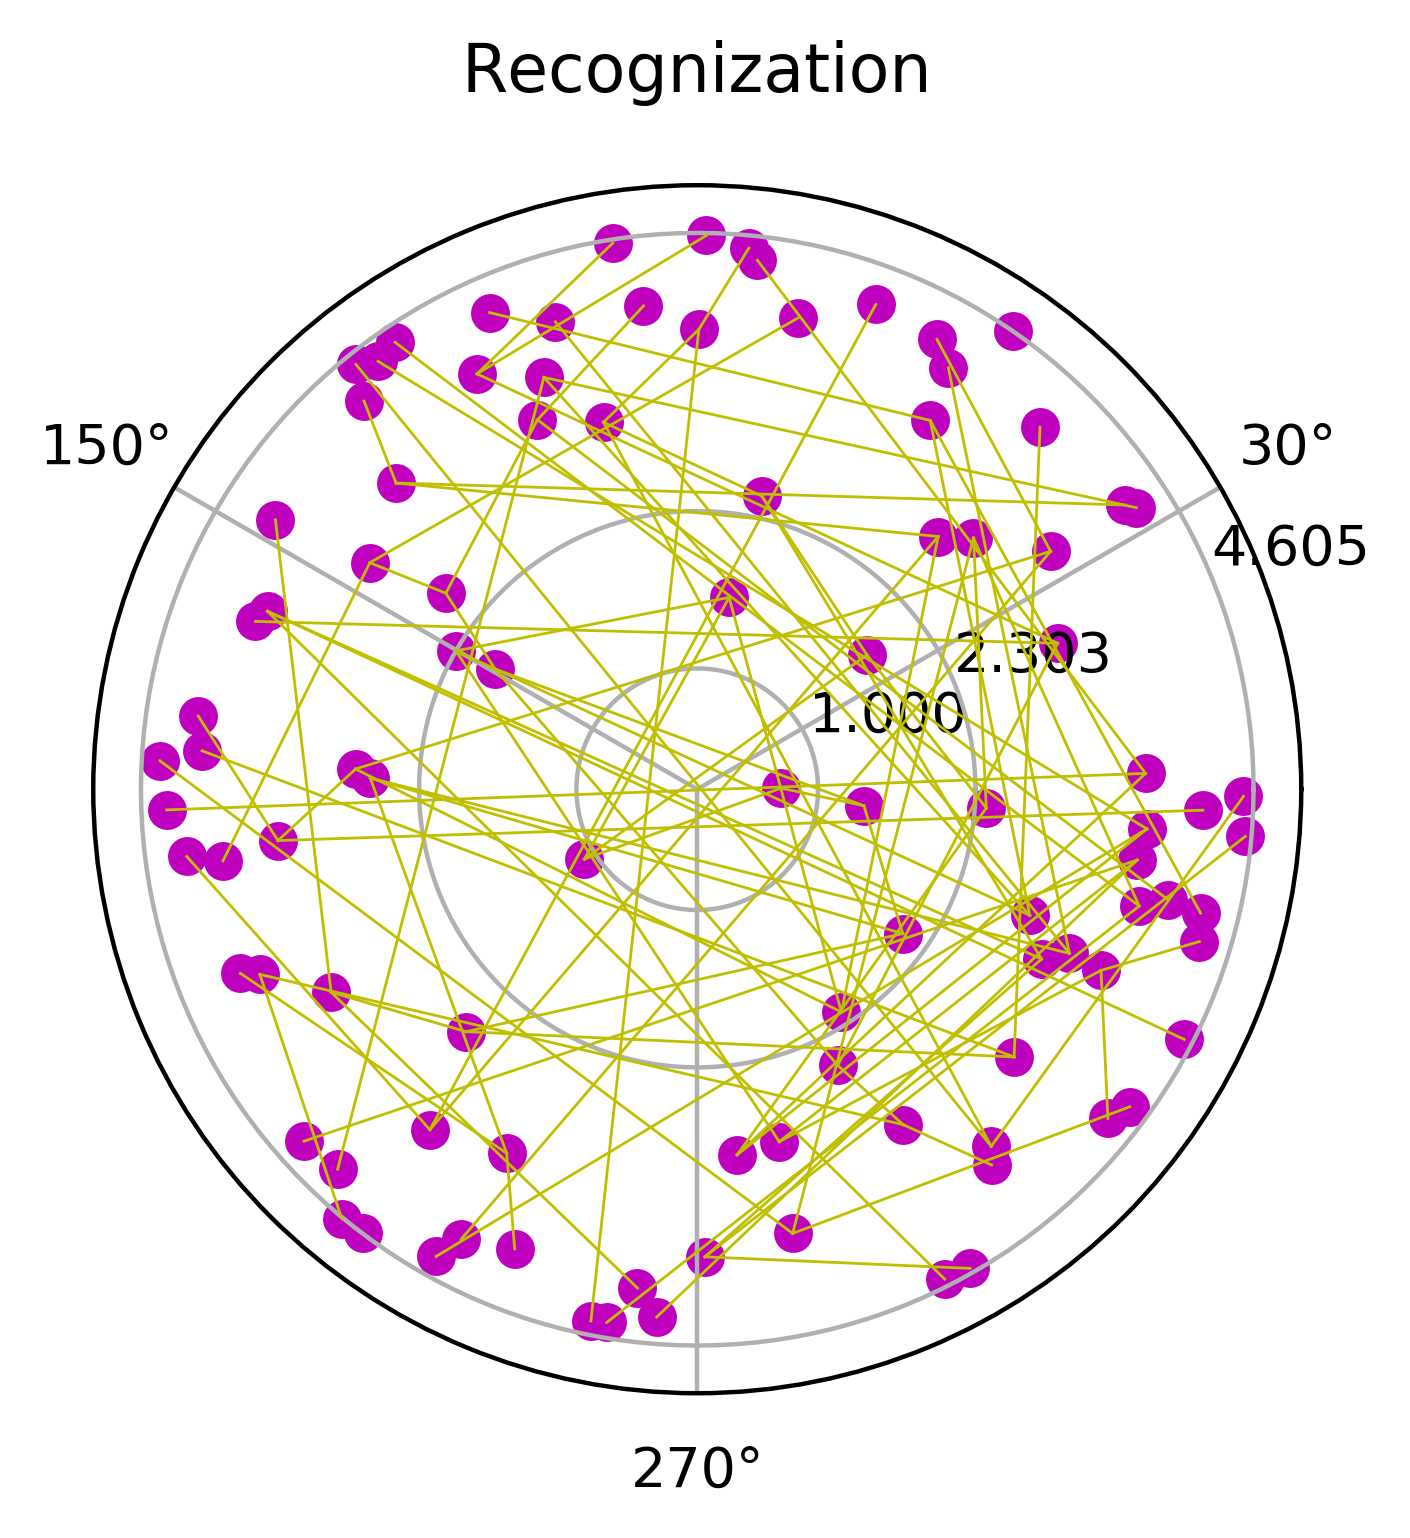

In [121]:
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, polar=True)
r = np.log(np.arange(1,len(theta_tree)+1)+1)
ax.scatter(theta_tree,r,c='m')
ax.set_ylim((0,5))
for i in range(len(theta_tree)):
    for j in range(i):
        if tree[i][j] == 1:
            ax.plot([theta_tree[i],theta_tree[j]], [r[i],r[j]], linewidth=0.5 ,c='y')
plt.title('Recognization')
plt.thetagrids([30,150,270])
plt.rgrids([1,np.log(10),np.log(100)])
plt.show()